# Bird Migration Dataset – Exploratory Data Analysis (EDA)
---
**Author:** Dhruvkumar Patel, San Jose State University 

**Date:** December 2025  

**Project:** Bird Migration Dataset – Exploratory Data Analysis (EDA)  

**Source:** [Kaggle Dataset](https://www.kaggle.com/)

---

This notebook performs a full EDA on the **Bird Migration Dataset (Data Visualization / EDA)** from Kaggle.

It includes:
- Data loading & basic structure checks  
- Missing value analysis  
- Categorical and numerical feature exploration  
- Geographic analysis using start/end coordinates  
- Outcome and behavior patterns (migration success, tracking quality, etc.)




In [ ]:


# 1. IMPORT LIBRARIES


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


pastel_palette = sns.color_palette("pastel")

sns.set_theme(
    style="whitegrid",
    context="talk",
    palette=pastel_palette,
    rc={
        "axes.facecolor": "#fcfcfc",
        "figure.facecolor": "#ffffff",
        "axes.edgecolor": "#e6e6e6",
        "grid.color": "#f0f0f0",
        "axes.titleweight": "bold",
        "axes.titlepad": 12,
        "axes.labelpad": 10,
        "xtick.color": "#555555",
        "ytick.color": "#555555",
    }
)

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.titleweight"] = "bold"

In [ ]:


# 2. LOAD DATASET

df = pd.read_csv('./sample_data/bird_migration_data.csv')
print("Shape:", df.shape)
display(df.head())


Shape: (10000, 42)


Bird_ID  Species         Region    Habitat Weather_Condition  \
0   B1000  Warbler  South America  Grassland            Stormy   
1   B1001    Stork  North America  Grassland            Stormy   
2   B1002     Hawk  South America   Mountain            Stormy   
3   B1003  Warbler  South America      Urban            Stormy   
4   B1004    Crane         Europe      Urban             Windy   

  Migration_Reason  Start_Latitude  Start_Longitude  End_Latitude  \
0          Feeding       11.906566      -169.378251     30.377647   
1         Breeding       62.301546      -111.475069     39.921092   
2  Avoid Predators       87.861164       -78.727327     66.990980   
3   Climate Change       35.770590       153.104341    -49.003145   
4  Avoid Predators      -21.611614       106.674824     11.681051   

   End_Longitude  ...  Migration_Interrupted  Interrupted_Reason  \
0     -21.366879  ...                    Yes               Storm   
1      47.963436  ...                    Yes              Injury   
2      19.448466  ...                     No         Lost Signal   
3    -157.868744  ...                    Yes         Lost Signal   
4    -115.022863  ...                     No                 NaN   

      Tagged_By  Tag_Weight_g  Migration_Success  Recovery_Location_Known  \
0  Researcher_A          27.0             Failed                       No   
1  Researcher_C          14.2         Successful                      Yes   
2  Researcher_B          16.1             Failed                       No   
3  Researcher_C          24.4         Successful                       No   
4  Researcher_B          25.8             Failed                      Yes   

   Recovery_Time_days  Observation_Counts  Observation_Quality  \
0                 102                  56                  Low   
1                 118                  61                  Low   
2                  41                  71                 High   
3                  15                  68                  Low   
4                  73                  67             Moderate   

                                    Origin  
0  11.906566441337574, -169.37825068830264  
1  62.301545854189925, -111.47506945435978  
2    87.86116387126651, -78.72732718179907  
3     35.77058955392532, 153.1043405316318  
4  -21.611614380025586, 106.67482429343966  

[5 rows x 42 columns]

In [ ]:


# 3. BASIC INFO & STRUCTURE


# Column names
print("Columns in dataset:")
print(df.columns.tolist())

# Info
print("\nData types and non-null counts:")
df.info()

# Basic statistics for numeric columns
display(df.describe())

# Basic statistics for categorical columns
display(df.describe(include="object"))


Columns in dataset:
['Bird_ID', 'Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason', 'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude', 'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 'Max_Altitude_m', 'Min_Altitude_m', 'Temperature_C', 'Wind_Speed_kmph', 'Humidity_%', 'Pressure_hPa', 'Visibility_km', 'Nesting_Success', 'Tag_Battery_Level_%', 'Signal_Strength_dB', 'Migration_Start_Month', 'Migration_End_Month', 'Rest_Stops', 'Predator_Sightings', 'Tag_Type', 'Migrated_in_Flock', 'Flock_Size', 'Food_Supply_Level', 'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason', 'Tagged_By', 'Tag_Weight_g', 'Migration_Success', 'Recovery_Location_Known', 'Recovery_Time_days', 'Observation_Counts', 'Observation_Quality', 'Origin']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  

Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  \
count    10000.000000     10000.000000  10000.000000   10000.000000   
mean        -0.321812        -0.394588      0.084391       0.467617   
std         51.919190       104.083440     51.709437     103.438134   
min        -89.999003      -179.993975    -89.998482    -179.902756   
25%        -45.390697       -91.444680    -43.664719     -88.871564   
50%         -0.138849        -0.479892     -0.163116       1.280823   
75%         44.480926        89.640253     44.957102      91.196076   
max         89.980302       179.989973     89.989145     179.955036   

       Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  \
count        10000.000000           10000.000000        10000.000000   
mean          2504.036134              49.994020           49.953394   
std            499.723298              10.026108            5.085296   
min            527.700000              12.600000           30.430000   
25%           2169.632500              43.200000           46.530000   
50%           2511.150000              50.050000           50.040000   
75%           2841.452500              56.800000           53.360000   
max           4428.320000              91.000000           68.950000   

       Max_Altitude_m  Min_Altitude_m  Temperature_C  ...  Pressure_hPa  \
count     10000.00000    10000.000000   10000.000000  ...  10000.000000   
mean       5504.80830      500.111800      12.566930  ...   1000.440810   
std        2595.28577      229.782907      13.073405  ...     28.959614   
min        1000.00000      100.000000     -10.000000  ...    950.000000   
25%        3277.75000      300.000000       1.200000  ...    975.000000   
50%        5521.00000      501.000000      12.500000  ...   1000.950000   
75%        7740.25000      698.000000      24.000000  ...   1025.500000   
max        9999.00000      899.000000      35.000000  ...   1050.000000   

       Visibility_km  Tag_Battery_Level_%  Signal_Strength_dB    Rest_Stops  \
count   10000.000000         10000.000000          10000.0000  10000.000000   
mean       10.636970            54.651800            -69.8408      7.380000   
std         5.504623            25.839271              9.9189      4.023583   
min         1.000000            10.000000           -107.9000      1.000000   
25%         5.900000            32.000000            -76.6000      4.000000   
50%        10.700000            55.000000            -69.8000      7.000000   
75%        15.400000            77.000000            -63.1000     11.000000   
max        20.000000            99.000000            -33.3000     14.000000   

       Predator_Sightings    Flock_Size  Tag_Weight_g  Recovery_Time_days  \
count        10000.000000  10000.000000  10000.000000        10000.000000   
mean             4.490200    248.714500     17.605870           60.490800   
std              2.872826    144.943771      7.200088           34.434028   
min              0.000000      1.000000      5.000000            1.000000   
25%              2.000000    124.000000     11.400000           31.000000   
50%              5.000000    248.000000     17.700000           61.000000   
75%              7.000000    376.000000     24.000000           91.000000   
max              9.000000    499.000000     30.000000          119.000000   

       Observation_Counts  
count        10000.000000  
mean            49.872800  
std             28.601997  
min              1.000000  
25%             25.000000  
50%             50.000000  
75%             74.000000  
max             99.000000  

[8 rows x 22 columns]

Bird_ID Species         Region  Habitat Weather_Condition  \
count    10000   10000          10000    10000             10000   
unique   10000       7              6        6                 5   
top     B10983    Hawk  South America  Wetland             Foggy   
freq         1    1464           1717     1699              2136   

       Migration_Reason Nesting_Success Migration_Start_Month  \
count             10000           10000                 10000   
unique                4               2                     8   
top             Feeding              No                   Mar   
freq               2573            5045                  1297   

       Migration_End_Month Tag_Type Migrated_in_Flock Food_Supply_Level  \
count                10000    10000             10000             10000   
unique                   7        3                 2                 3   
top                    Nov      GPS               Yes              High   
freq                  1474     3340              5109              3412   

       Tracking_Quality Migration_Interrupted Interrupted_Reason  \
count             10000                 10000               8019   
unique                4                     2                  4   
top                Fair                   Yes              Storm   
freq               2521                  5031               2059   

           Tagged_By Migration_Success Recovery_Location_Known  \
count          10000             10000                   10000   
unique             3                 2                       2   
top     Researcher_B        Successful                     Yes   
freq            3348              5094                    5013   

       Observation_Quality                                  Origin  
count                10000                                   10000  
unique                   3                                   10000  
top                    Low  -16.47058514615597, -67.86895894599819  
freq                  3442                                       1

# Missing Values Analysis
#  Bar chart - This chart helps us validate data quality and confirm which features are strong candidates for dashboard visuals
# Heatmap - The heatmap reassures us that data completeness is uniform, allowing us to build stable dashboard visuals without unexpected gaps.

Missing values summary:


Missing Count  Missing %
Interrupted_Reason              1981      19.81
Species                            0       0.00
Bird_ID                            0       0.00
Habitat                            0       0.00
Weather_Condition                  0       0.00
Migration_Reason                   0       0.00
Start_Latitude                     0       0.00
Start_Longitude                    0       0.00
End_Latitude                       0       0.00
End_Longitude                      0       0.00
Region                             0       0.00
Flight_Distance_km                 0       0.00
Flight_Duration_hours              0       0.00
Max_Altitude_m                     0       0.00
Average_Speed_kmph                 0       0.00
Temperature_C                      0       0.00
Wind_Speed_kmph                    0       0.00
Humidity_%                         0       0.00
Min_Altitude_m                     0       0.00
Visibility_km                      0       0.00

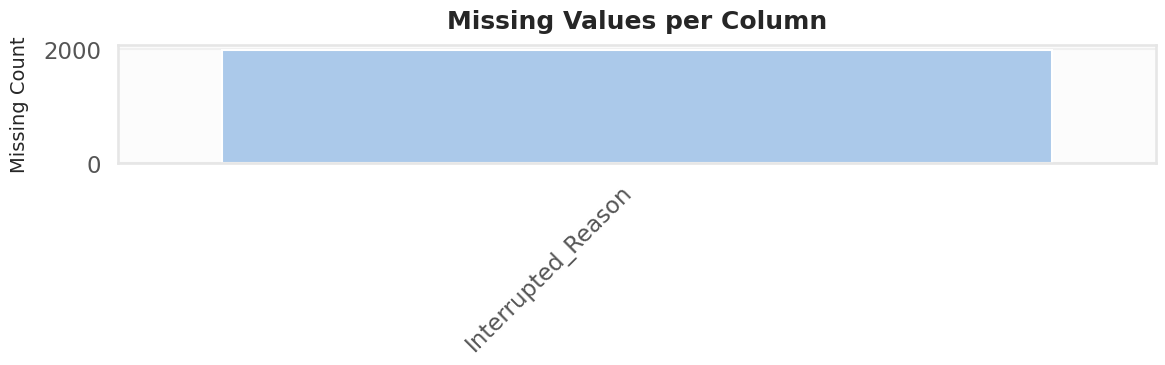

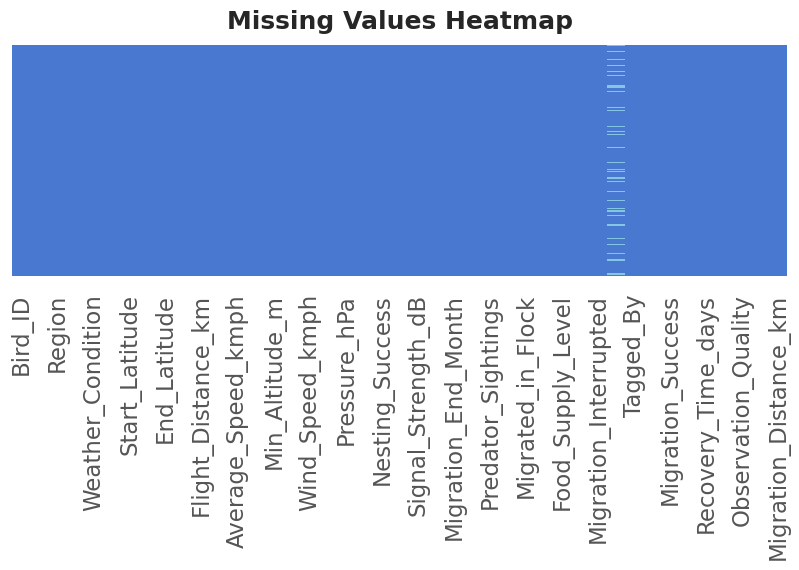

In [ ]:

# 4. MISSING VALUES
# bar graph - This chart helps us validate data quality and confirm which features are strong candidates for dashboard visuals
#


missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
}).sort_values("Missing Count", ascending=False)

print("Missing values summary:")
display(missing_df.head(20))

# ---- Bar plot (only columns that actually have missing values) ----
missing_nonzero = missing_df[missing_df["Missing Count"] > 0]

if not missing_nonzero.empty:
    plt.figure(figsize=(12, 4))
    sns.barplot(
        x=missing_nonzero.index,
        y=missing_nonzero["Missing Count"],
        palette=sns.color_palette("pastel", n_colors=len(missing_nonzero))
    )
    plt.xticks(rotation=45, ha="right")
    plt.title("Missing Values per Column")
    plt.ylabel("Missing Count")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values in any column 🎉")

# ---- Heatmap of missing values (thin pastel stripes) ----
plt.figure(figsize=(10, 3))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap=sns.color_palette("muted", as_cmap=True),
    yticklabels=False
)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()


## Categorical Feature Exploration - helps compare patterns across species, regions, and environmental conditions

Categorical columns used: ['Species', 'Region', 'Habitat', 'Weather_Condition', 'Migration_Reason', 'Tracking_Quality', 'Migration_Interrupted', 'Interrupted_Reason', 'Migration_Success', 'Observation_Quality', 'Origin', 'Tag_Type', 'Food_Supply_Level']

Value counts for: Species


Species
Hawk       1464
Stork      1439
Warbler    1429
Goose      1428
Eagle      1426
Swallow    1423
Crane      1391
Name: count, dtype: int64

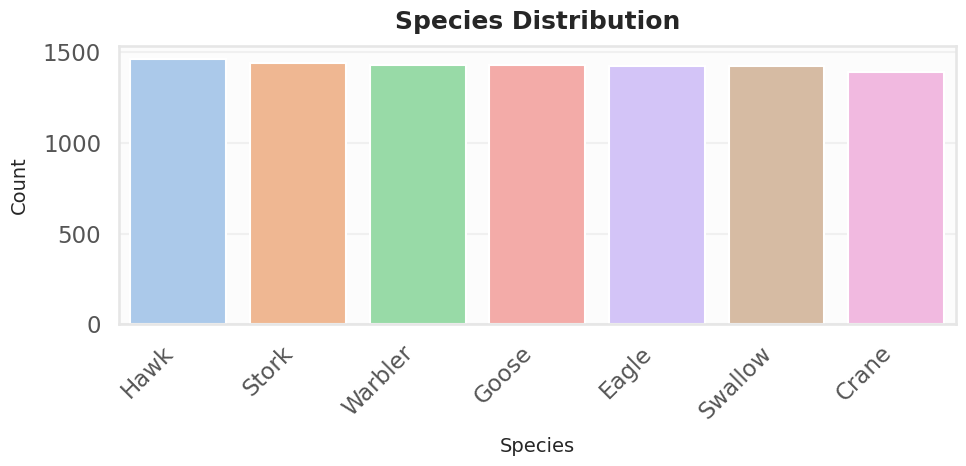


Value counts for: Region


Region
South America    1717
North America    1699
Asia             1687
Africa           1669
Australia        1633
Europe           1595
Name: count, dtype: int64

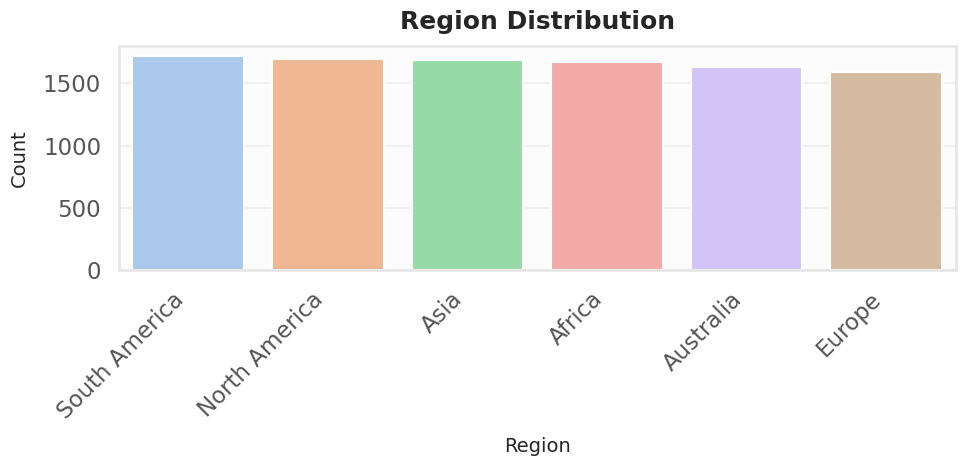


Value counts for: Habitat


Habitat
Wetland      1699
Coastal      1680
Urban        1674
Forest       1663
Mountain     1647
Grassland    1637
Name: count, dtype: int64

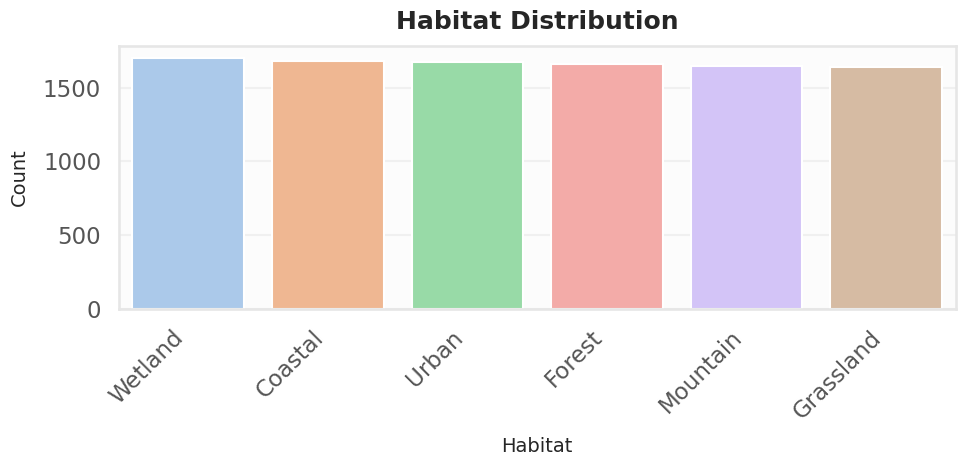


Value counts for: Weather_Condition


Weather_Condition
Foggy     2136
Stormy    2010
Windy     2009
Clear     1925
Rainy     1920
Name: count, dtype: int64

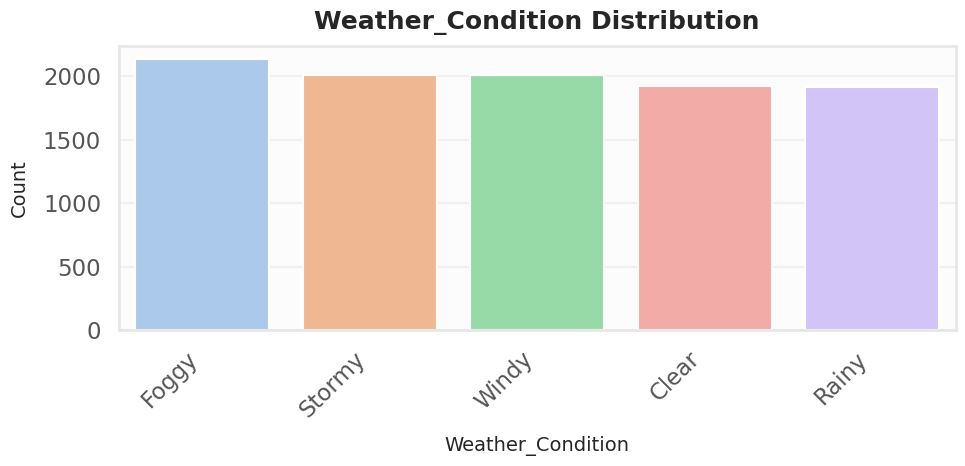


Value counts for: Migration_Reason


Migration_Reason
Feeding            2573
Avoid Predators    2518
Climate Change     2473
Breeding           2436
Name: count, dtype: int64

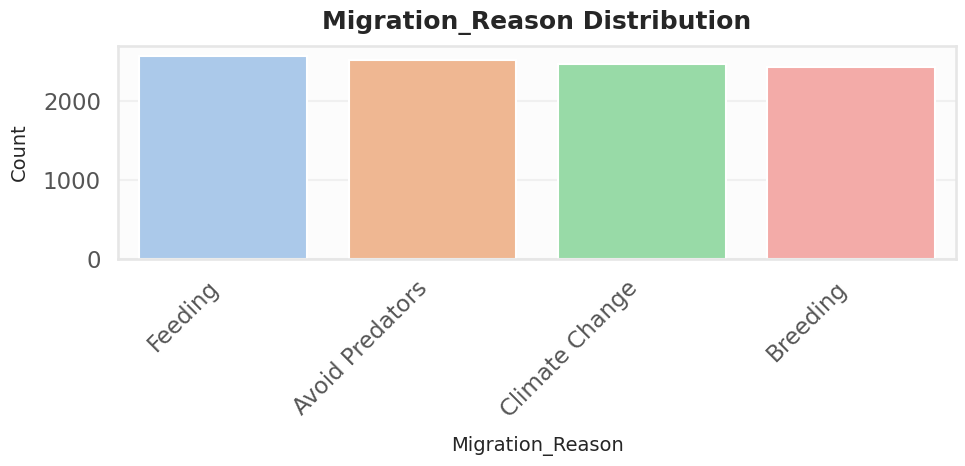


Value counts for: Tracking_Quality


Tracking_Quality
Fair         2521
Good         2519
Poor         2482
Excellent    2478
Name: count, dtype: int64

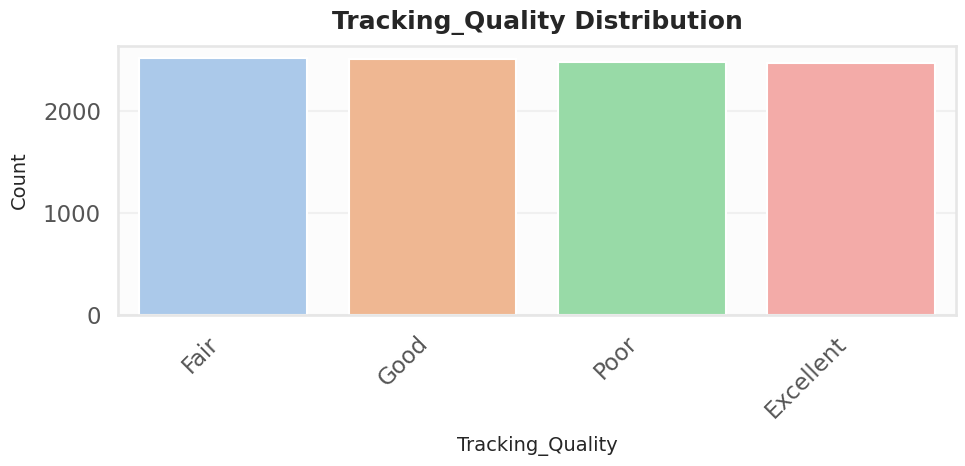


Value counts for: Migration_Interrupted


Migration_Interrupted
Yes    5031
No     4969
Name: count, dtype: int64

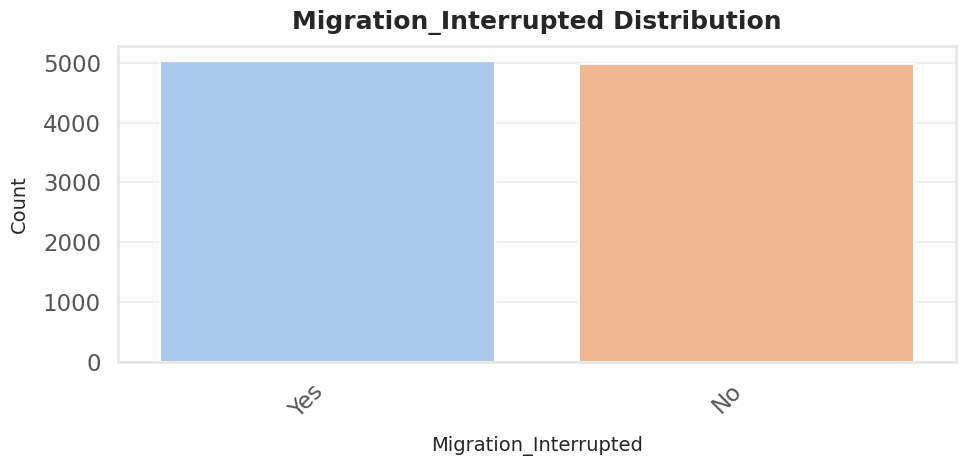


Value counts for: Interrupted_Reason


Interrupted_Reason
Storm          2059
Injury         2023
Predator       1994
Lost Signal    1943
Name: count, dtype: int64

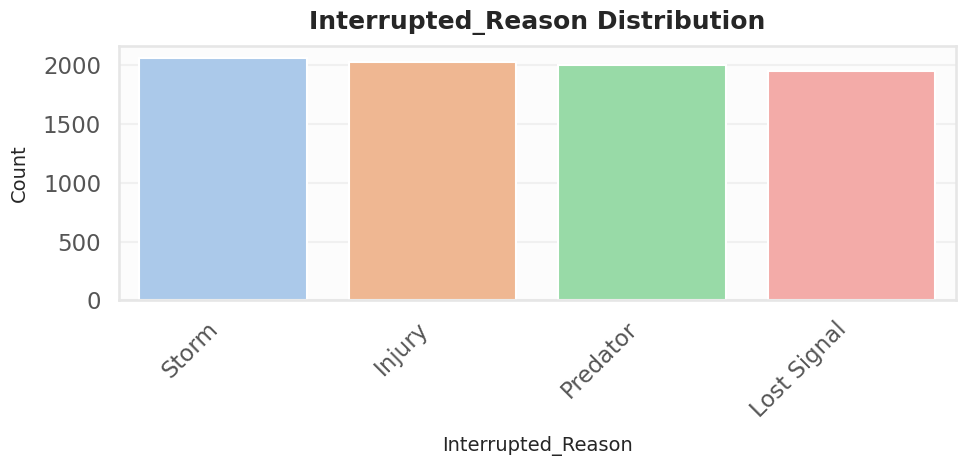


Value counts for: Migration_Success


Migration_Success
Successful    5094
Failed        4906
Name: count, dtype: int64

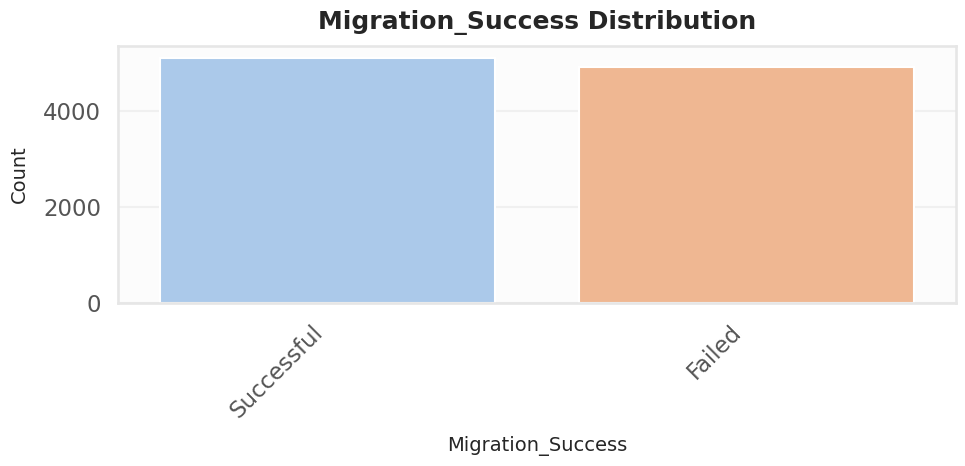


Value counts for: Observation_Quality


Observation_Quality
Low         3442
High        3345
Moderate    3213
Name: count, dtype: int64

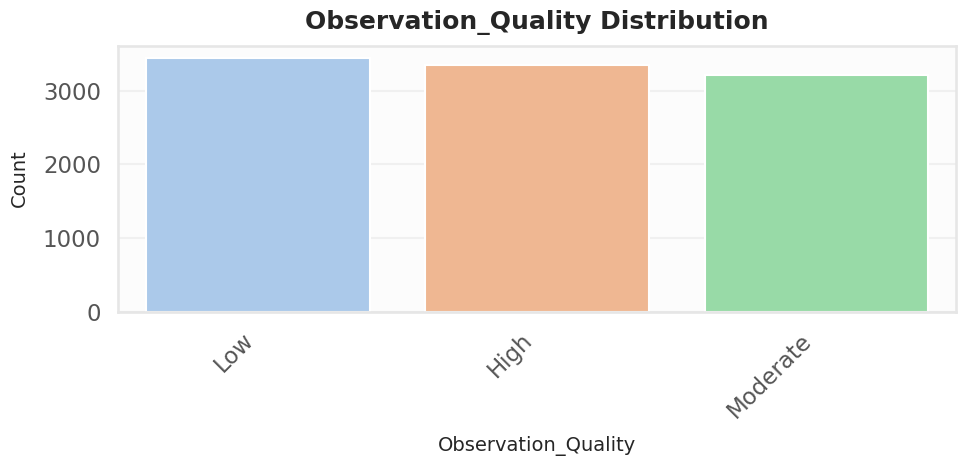


Value counts for: Origin


Origin
-16.47058514615597, -67.86895894599819     1
13.983541563100516, 132.773011501824       1
81.7060459251251, 98.1168561043524         1
0.1095630696178204, 48.88418614777089      1
-58.0020687200441, 83.54677268718308       1
-69.93607931780844, -110.40228588555412    1
-18.48201399687356, 85.5292066134977       1
-46.61473342385529, 133.15487283304395     1
-48.046987242159375, 155.83946161807245    1
-5.178929882409904, 69.0381430894166       1
46.48100895928627, -55.43126252518894      1
-15.441805392875068, 87.65212446178754     1
66.82099367897521, -134.3491264597077      1
88.80272291437217, 36.916790284885565      1
42.51918879774294, -42.01176248663055      1
76.26113855807353, -64.74792697956458      1
-80.59200558043877, -56.1304073075551      1
-37.44479274456849, -92.35267410229864     1
-27.99089696463796, -108.96029512509456    1
88.17887047847998, 22.43419187221619       1
Name: count, dtype: int64

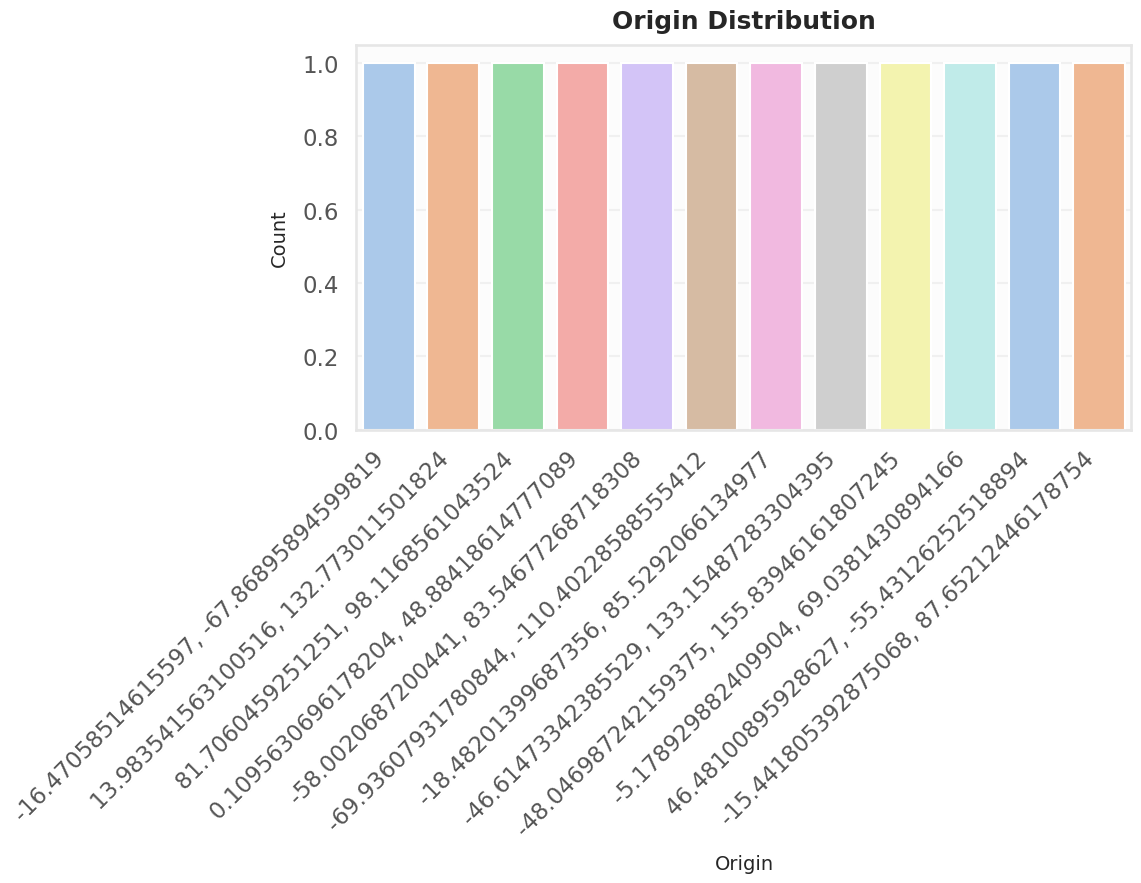


Value counts for: Tag_Type


Tag_Type
GPS          3340
Radio        3334
Satellite    3326
Name: count, dtype: int64

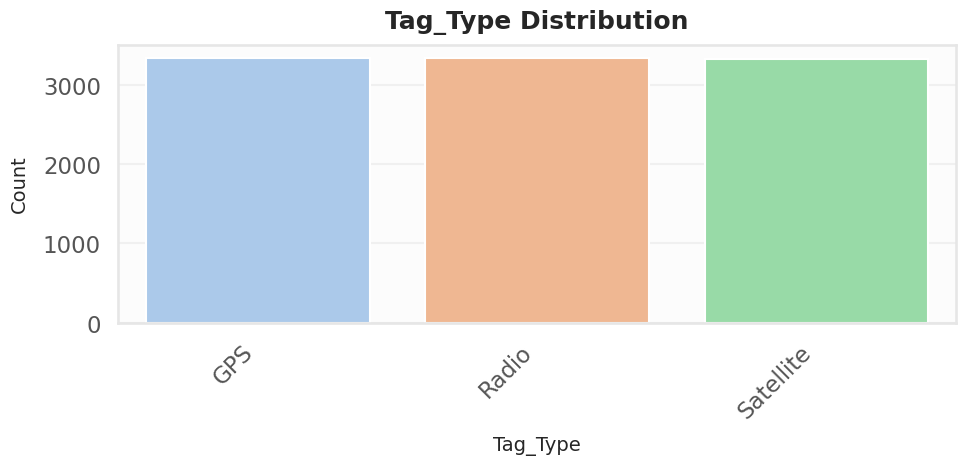


Value counts for: Food_Supply_Level


Food_Supply_Level
High      3412
Low       3349
Medium    3239
Name: count, dtype: int64

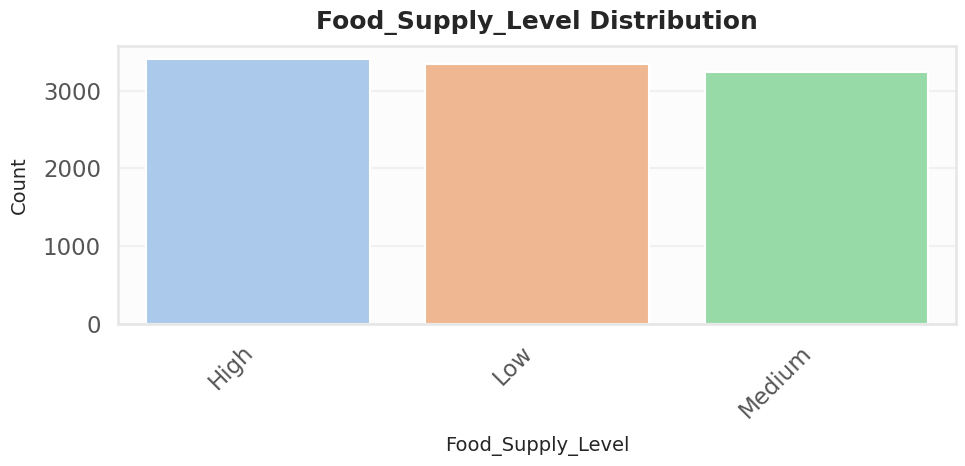

In [ ]:


# 5. CATEGORICAL FEATURES

categorical_candidates = [
    "Species",
    "Region",
    "Habitat",
    "Weather_Condition",
    "Migration_Reason",
    "Tracking_Quality",
    "Migration_Interrupted",
    "Interrupted_Reason",
    "Migration_Success",
    "Observation_Quality",
    "Origin",           # from your screenshot
    "Tag_Type",
    "Food_Supply_Level"
]

cat_cols = [c for c in categorical_candidates if c in df.columns]
print("Categorical columns used:", cat_cols)

for col in cat_cols:
    print(f"\nValue counts for: {col}")
    display(df[col].value_counts().head(20))

    plt.figure(figsize=(10, 5))
    order = df[col].value_counts().head(12).index
    sns.countplot(
        data=df,
        x=col,
        order=order,
        palette="pastel"
    )
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## Numerical Feature Exploration - nderstand the scale and behavior of each metric, which informs how we summarize them visually in the dashboard.

Numeric columns used: ['Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude', 'Flight_Distance_km', 'Flight_Duration_hours', 'Average_Speed_kmph', 'Temperature_C', 'Wind_Speed_kmph', 'Pressure_hPa', 'Visibility_km', 'Tag_Weight_g', 'Observation_Counts', 'Nesting_Success', 'Flock_Size']


Start_Latitude  Start_Longitude  End_Latitude  End_Longitude  \
count    10000.000000     10000.000000  10000.000000   10000.000000   
mean        -0.321812        -0.394588      0.084391       0.467617   
std         51.919190       104.083440     51.709437     103.438134   
min        -89.999003      -179.993975    -89.998482    -179.902756   
25%        -45.390697       -91.444680    -43.664719     -88.871564   
50%         -0.138849        -0.479892     -0.163116       1.280823   
75%         44.480926        89.640253     44.957102      91.196076   
max         89.980302       179.989973     89.989145     179.955036   

       Flight_Distance_km  Flight_Duration_hours  Average_Speed_kmph  \
count        10000.000000           10000.000000        10000.000000   
mean          2504.036134              49.994020           49.953394   
std            499.723298              10.026108            5.085296   
min            527.700000              12.600000           30.430000   
25%           2169.632500              43.200000           46.530000   
50%           2511.150000              50.050000           50.040000   
75%           2841.452500              56.800000           53.360000   
max           4428.320000              91.000000           68.950000   

       Temperature_C  Wind_Speed_kmph  Pressure_hPa  Visibility_km  \
count   10000.000000     10000.000000  10000.000000   10000.000000   
mean       12.566930        30.363380   1000.440810      10.636970   
std        13.073405        17.316859     28.959614       5.504623   
min       -10.000000         0.000000    950.000000       1.000000   
25%         1.200000        15.300000    975.000000       5.900000   
50%        12.500000        30.500000   1000.950000      10.700000   
75%        24.000000        45.400000   1025.500000      15.400000   
max        35.000000        60.000000   1050.000000      20.000000   

       Tag_Weight_g  Observation_Counts    Flock_Size  
count  10000.000000        10000.000000  10000.000000  
mean      17.605870           49.872800    248.714500  
std        7.200088           28.601997    144.943771  
min        5.000000            1.000000      1.000000  
25%       11.400000           25.000000    124.000000  
50%       17.700000           50.000000    248.000000  
75%       24.000000           74.000000    376.000000  
max       30.000000           99.000000    499.000000

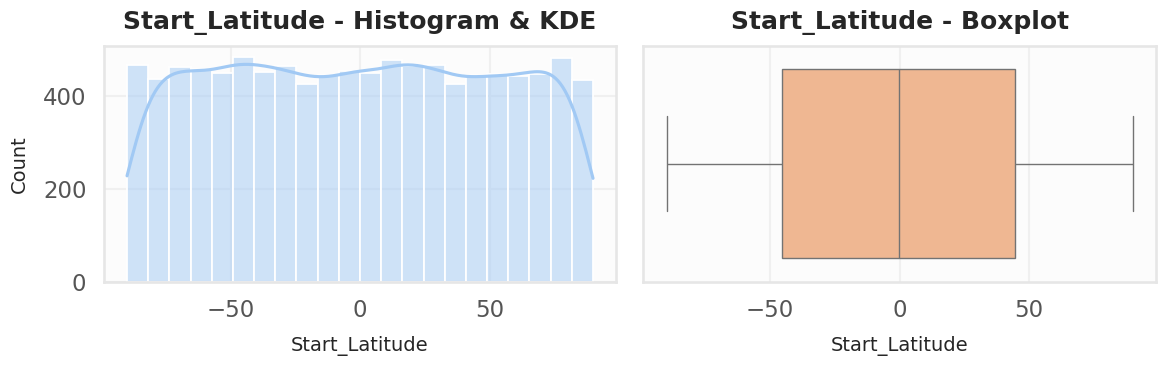

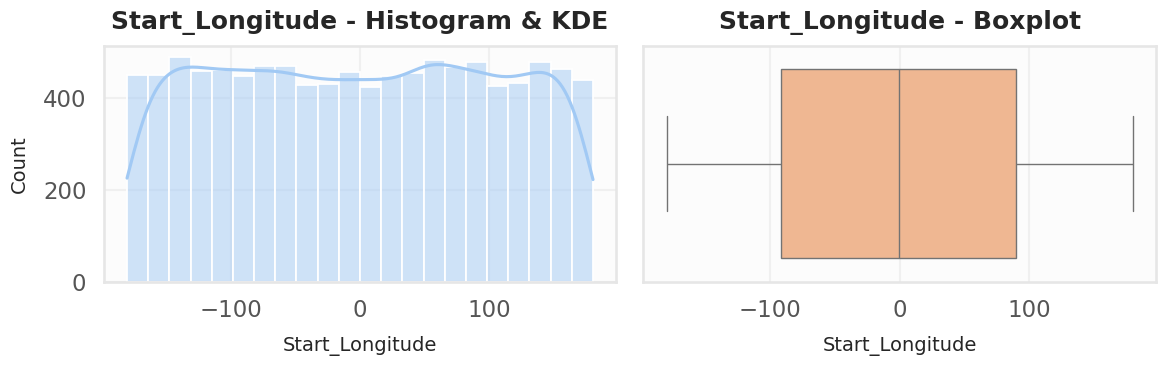

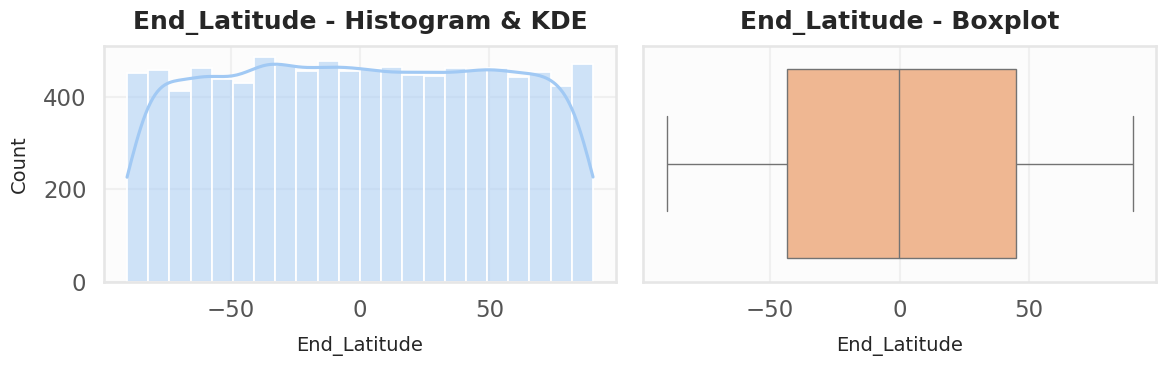

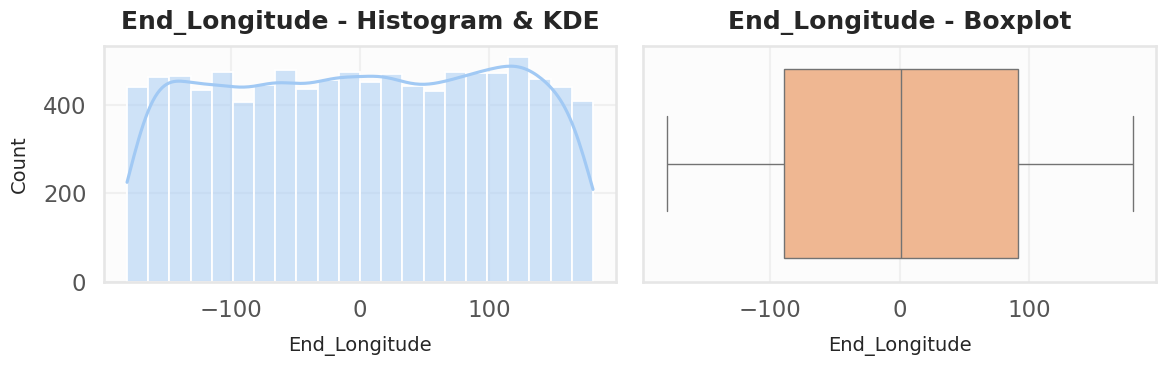

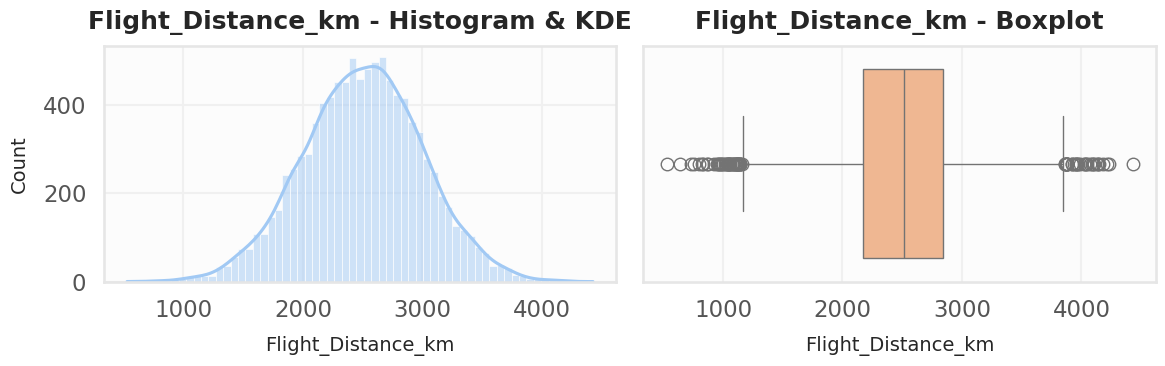

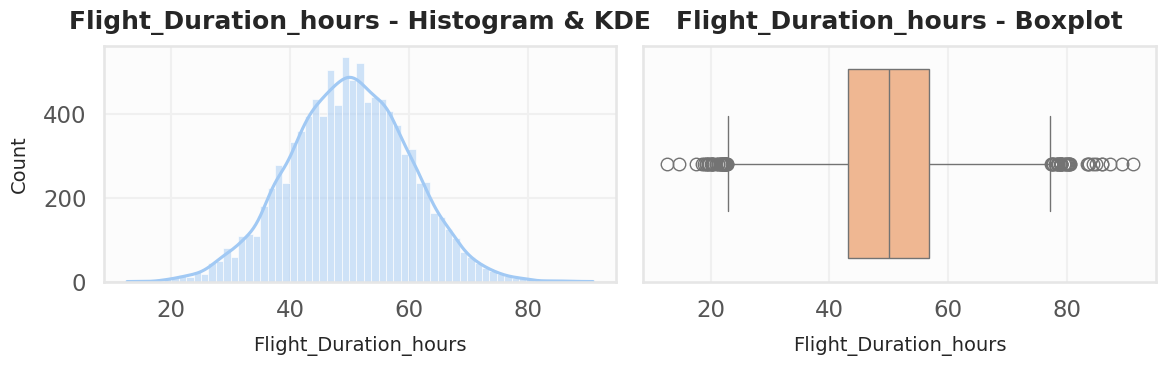

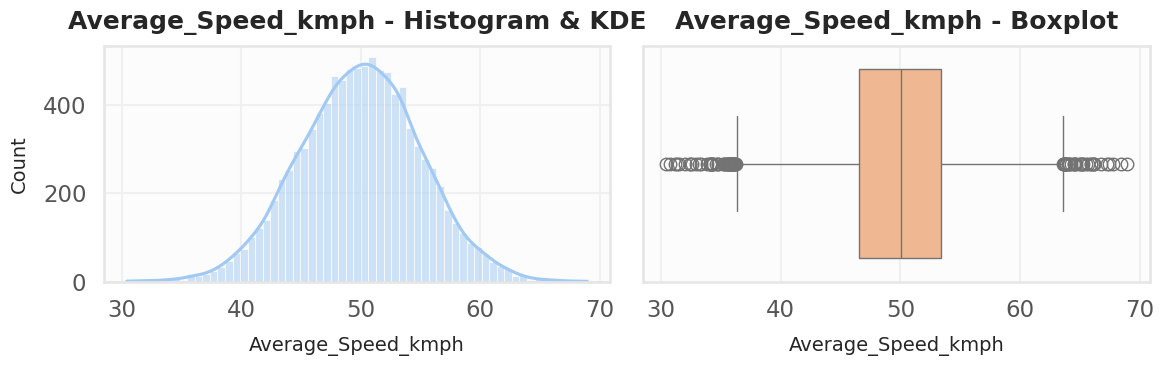

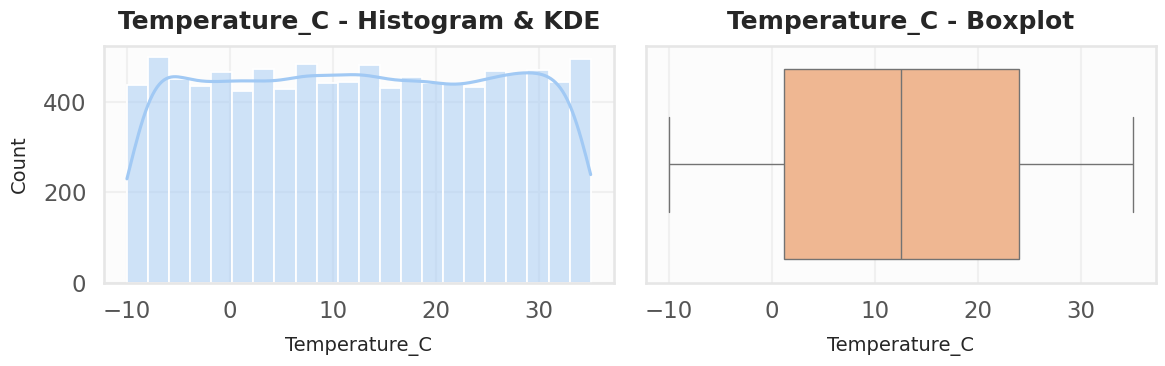

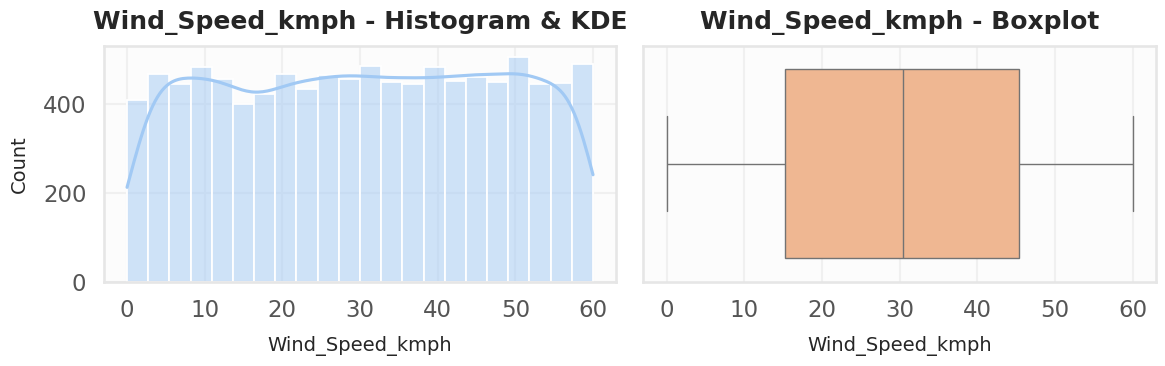

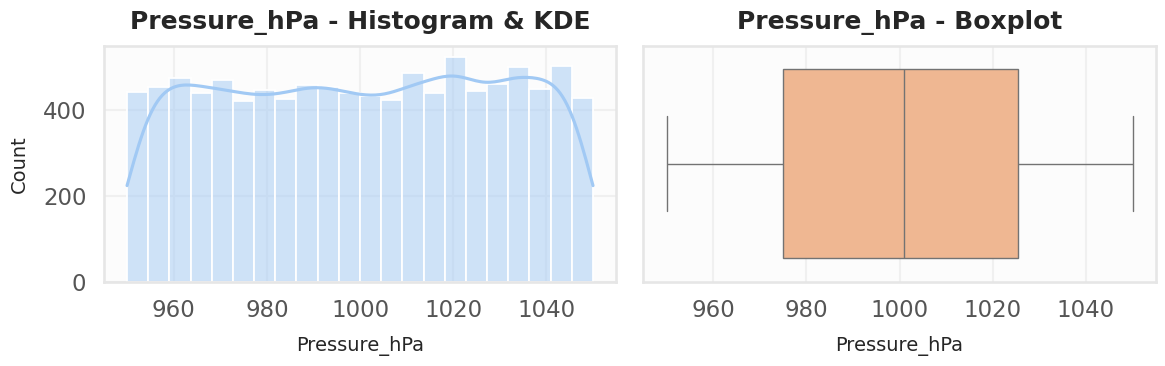

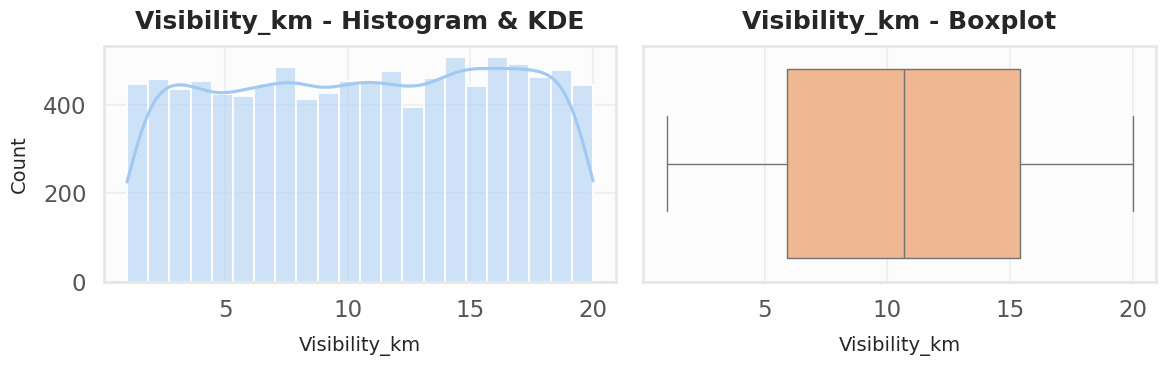

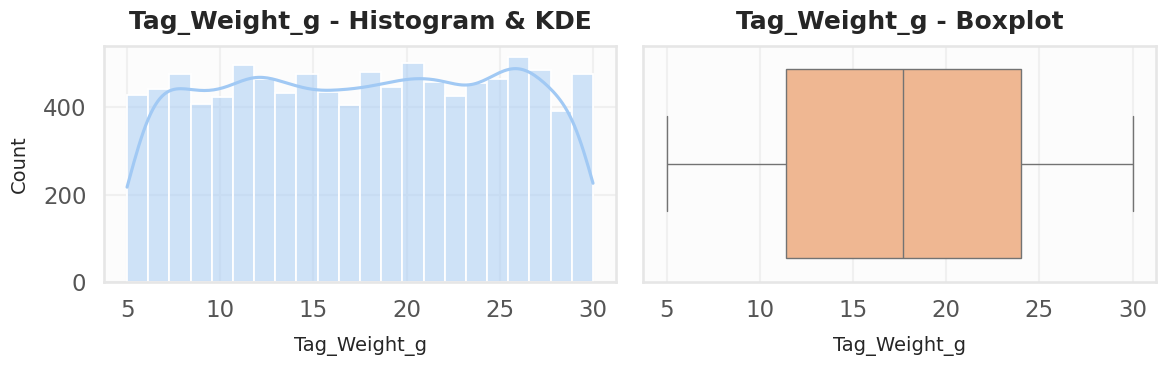

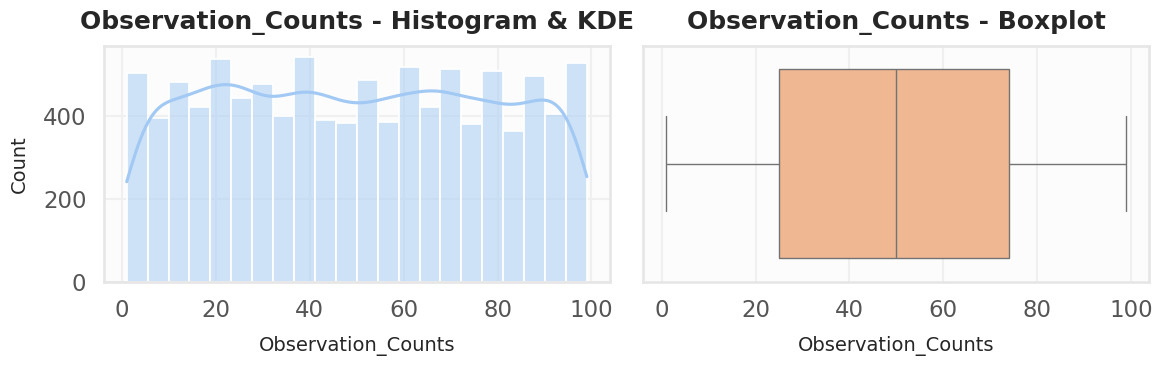

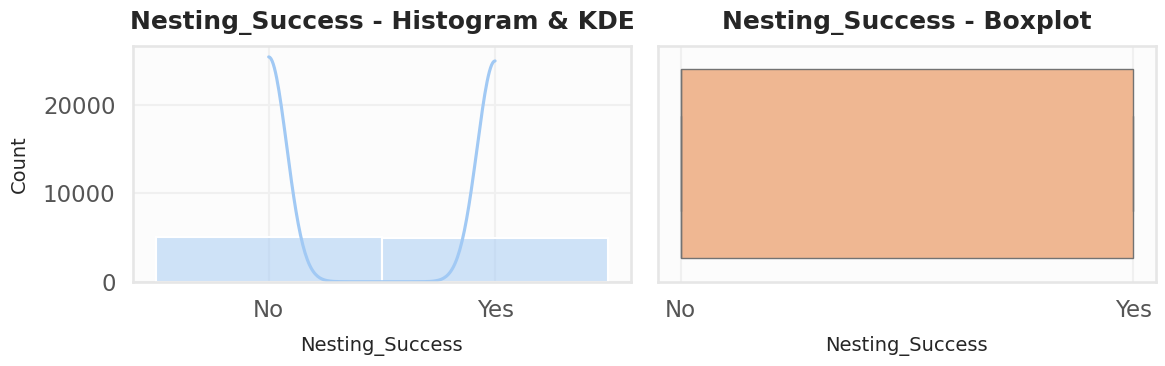

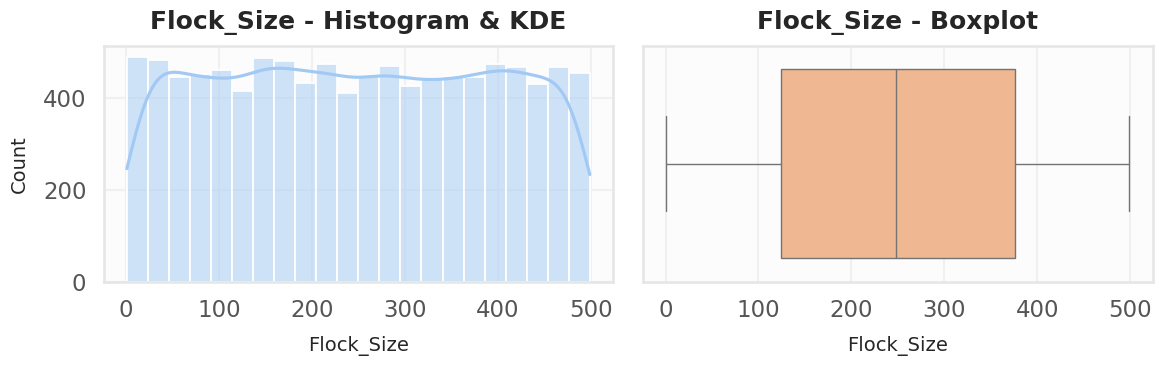

In [ ]:


# 6. NUMERICAL FEATURES

numeric_candidates = [
    "Start_Latitude",
    "Start_Longitude",
    "End_Latitude",
    "End_Longitude",
    "Flight_Distance_km",
    "Flight_Duration_hours",
    "Average_Speed_kmph",
    "Temperature_C",
    "Wind_Speed_kmph",
    "Pressure_hPa",
    "Visibility_km",
    "Tag_Weight_g",
    "Tag_Height_m",
    "Battery_Level_%",
    "Observation_Counts",
    "Nesting_Success",
    "Flock_Size"
]

num_cols = [c for c in numeric_candidates if c in df.columns]
print("Numeric columns used:", num_cols)

display(df[num_cols].describe())

# ---- hist + boxplot for each numeric column ----
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color=pastel_palette[0])
    axes[0].set_title(f"{col} - Histogram & KDE")

    sns.boxplot(x=df[col], ax=axes[1], color=pastel_palette[1])
    axes[1].set_title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

## Correlation Analysis

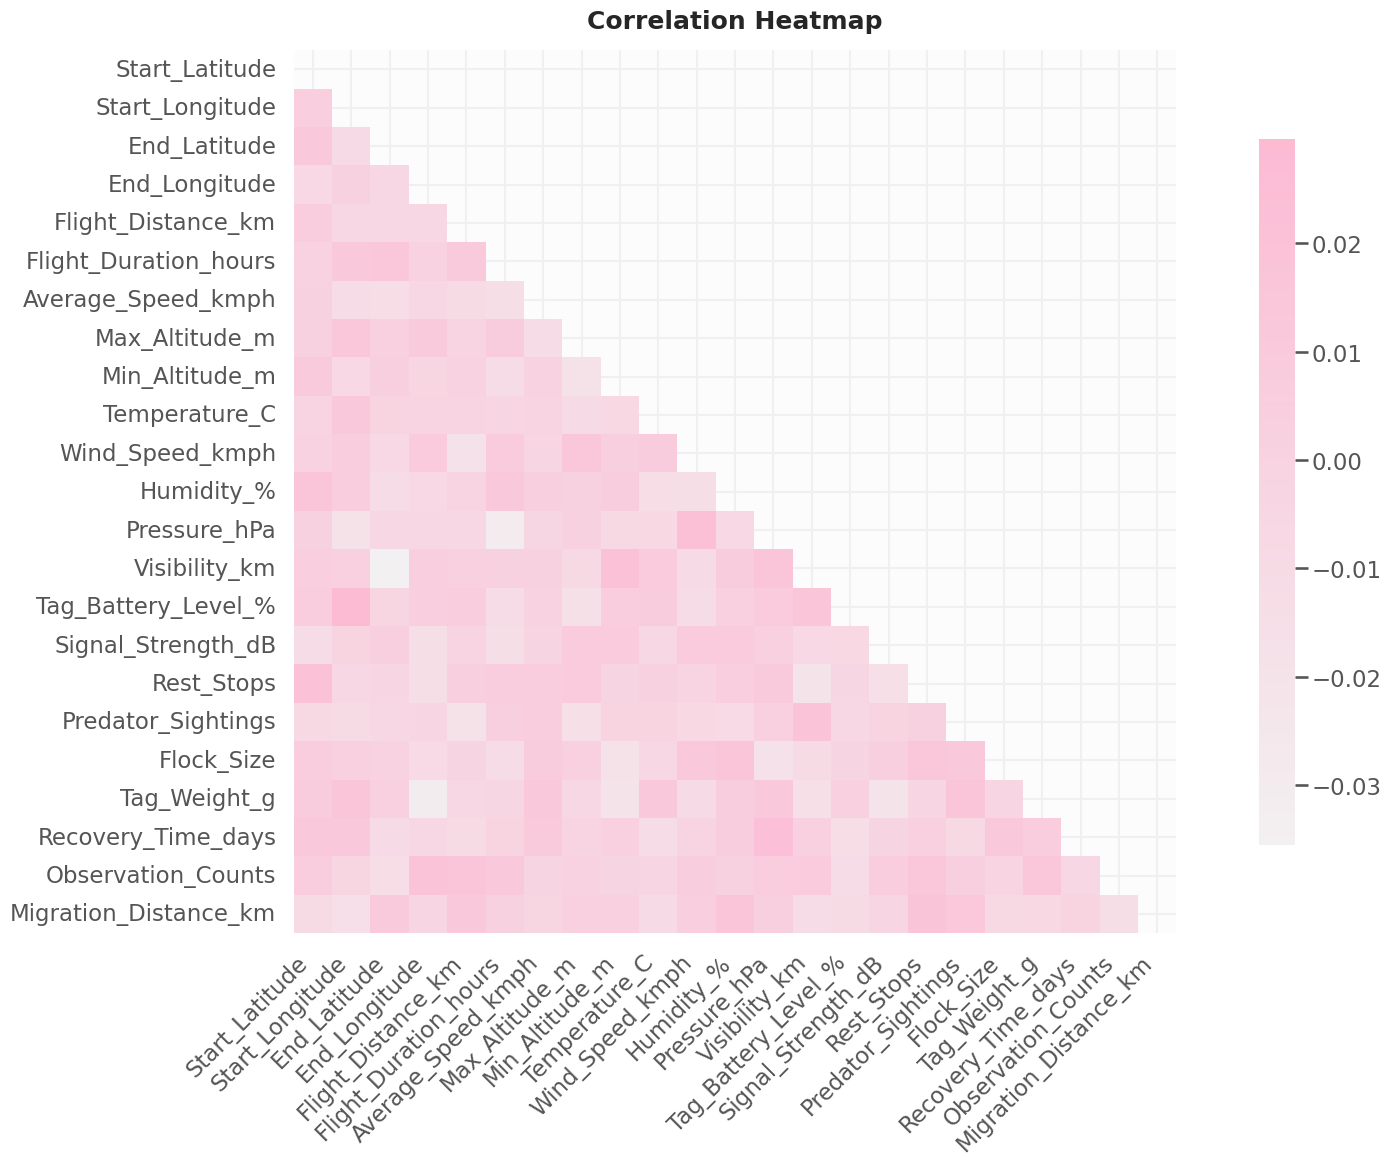

In [ ]:


# 7. CORRELATION HEATMAP
import numpy as np

# 1. Keep only numeric columns
numeric_only = df.select_dtypes(include=["int64", "float64"])

# 2. Compute correlation
corr = numeric_only.corr()


mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(
    corr,
    mask=mask,
    cmap=sns.light_palette("#fcbad3", as_cmap=True),
    square=True,
    cbar_kws={"shrink": 0.8},
    annot=False
)
plt.title("Correlation Heatmap", fontsize=18, weight="bold", pad=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Geographic Patterns – Start vs End Coordinates

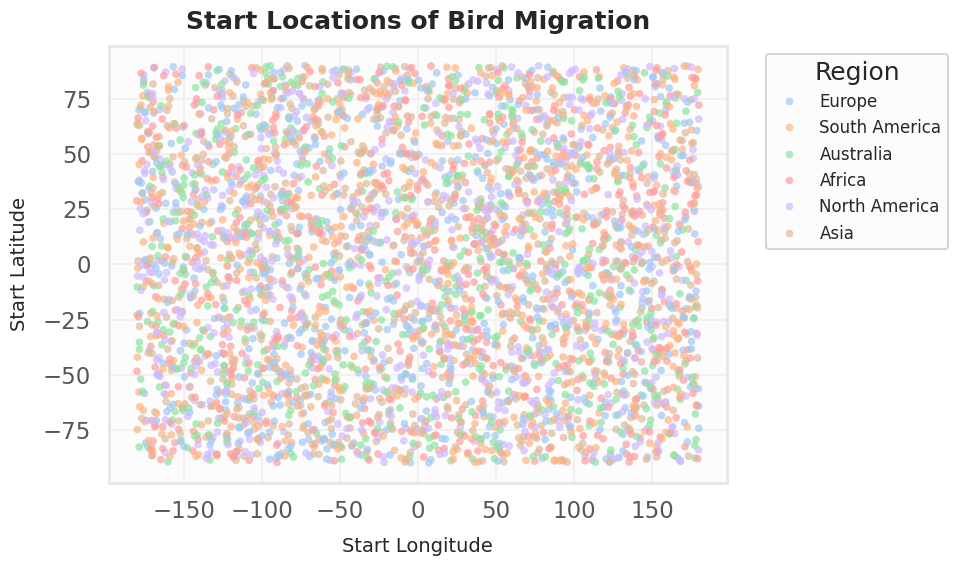

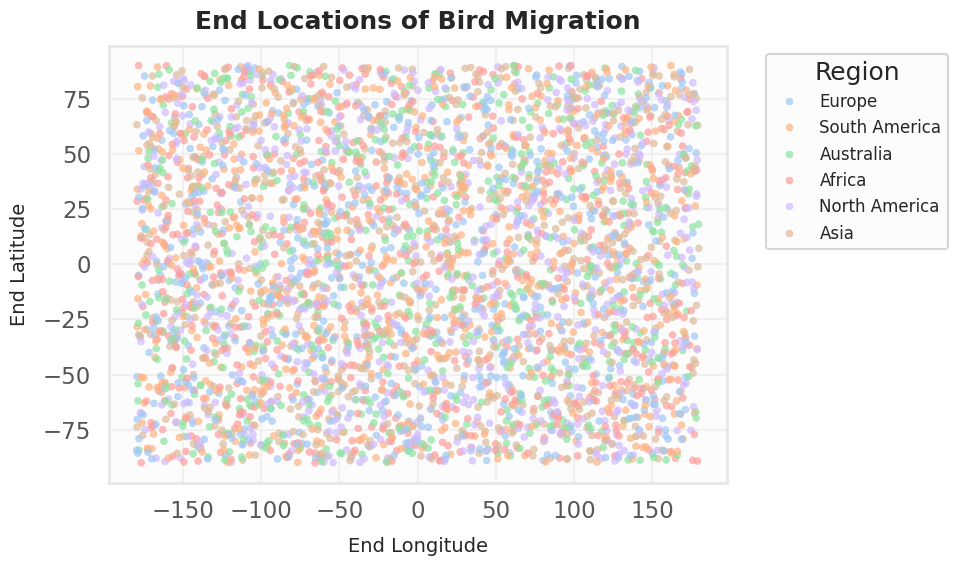

In [ ]:


# 8. GEOGRAPHIC ANALYSIS


has_start = "Start_Latitude" in df.columns and "Start_Longitude" in df.columns
has_end   = "End_Latitude"   in df.columns and "End_Longitude"   in df.columns


max_points = 4000
plot_df = df.sample(n=max_points, random_state=42) if len(df) > max_points else df

if has_start:
    plt.figure()
    sns.scatterplot(
        data=plot_df,
        x="Start_Longitude",
        y="Start_Latitude",
        hue="Region" if "Region" in df.columns else None,
        palette="pastel",
        alpha=0.7,
        s=25,
        edgecolor=None
    )
    plt.title("Start Locations of Bird Migration")
    plt.xlabel("Start Longitude")
    plt.ylabel("Start Latitude")
    if "Region" in df.columns:
        plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

if has_end:
    plt.figure()
    sns.scatterplot(
        data=plot_df,
        x="End_Longitude",
        y="End_Latitude",
        hue="Region" if "Region" in df.columns else None,
        palette="pastel",
        alpha=0.7,
        s=25,
        edgecolor=None
    )
    plt.title("End Locations of Bird Migration")
    plt.xlabel("End Longitude")
    plt.ylabel("End Latitude")
    if "Region" in df.columns:
        plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

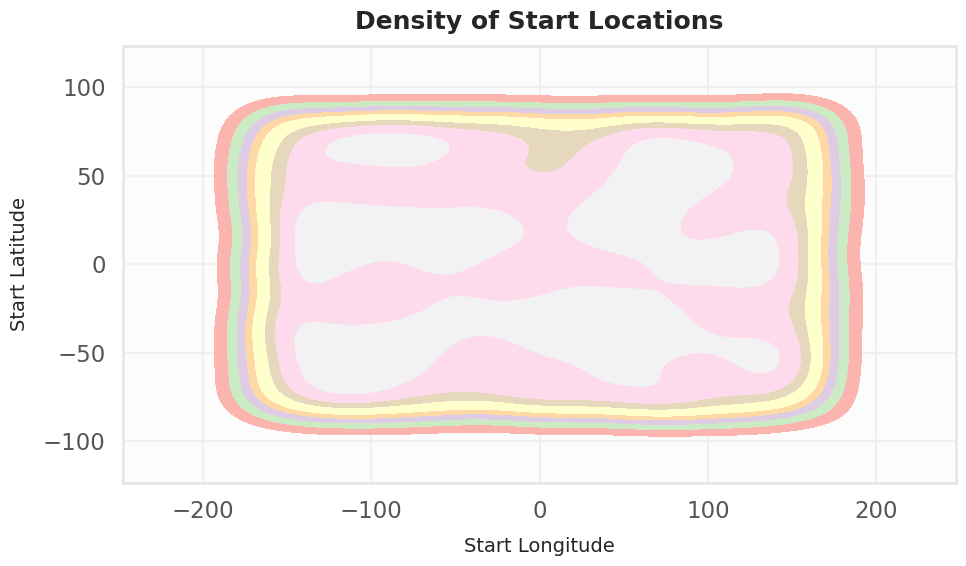

In [ ]:
if has_start:
    plt.figure()
    sns.kdeplot(
        data=df,
        x="Start_Longitude",
        y="Start_Latitude",
        fill=True,
        cmap="Pastel1",
        thresh=0.05,
        levels=30
    )
    plt.title("Density of Start Locations")
    plt.xlabel("Start Longitude")
    plt.ylabel("Start Latitude")
    plt.tight_layout()
    plt.show()

## Migration Distance Approximation

count    10000.000000
mean      9959.027012
std       4751.284834
min        106.361207
25%       6187.433993
50%       9901.357501
75%      13736.965571
max      19970.820160
Name: Migration_Distance_km, dtype: float64


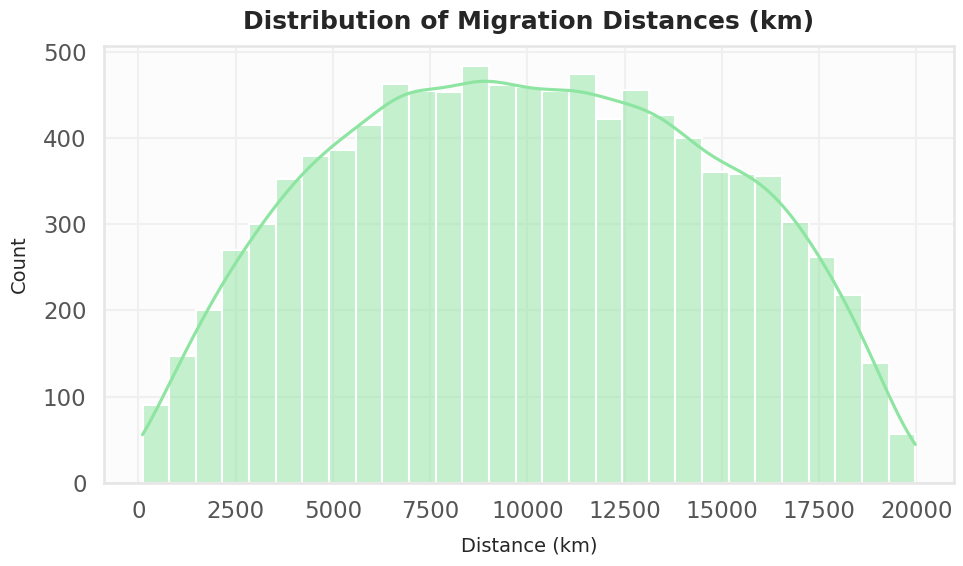

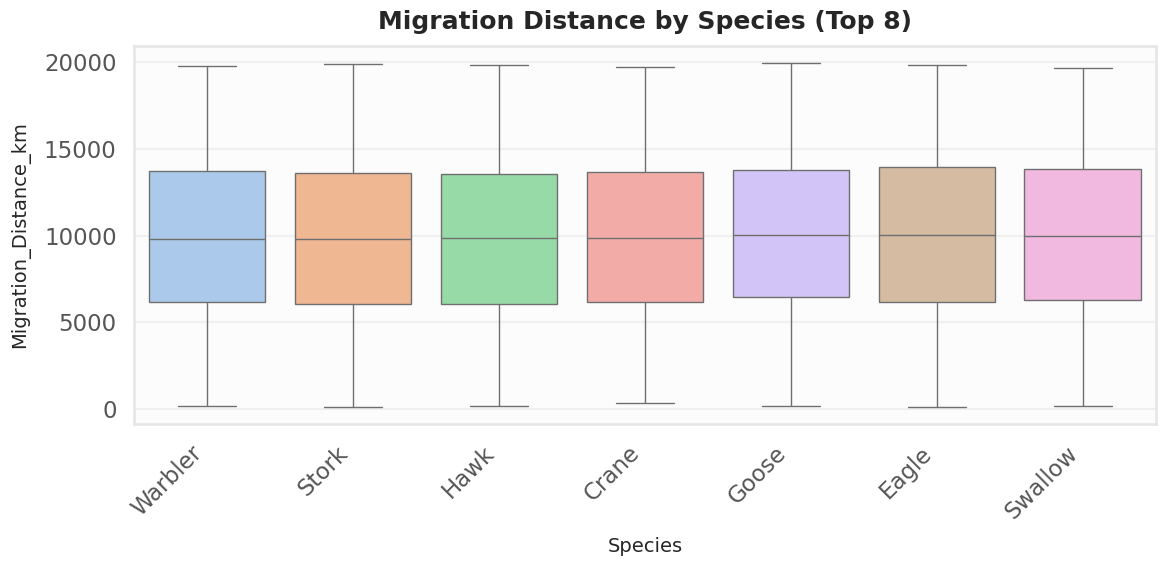

In [ ]:

# 9. MIGRATION DISTANCE

def haversine_distance(lat1, lon1, lat2, lon2):
    """Approximate great-circle distance between two points on Earth (km)."""
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

has_both = has_start and has_end

if has_both:
    if "Migration_Distance_km" not in df.columns:
        df["Migration_Distance_km"] = haversine_distance(
            df["Start_Latitude"], df["Start_Longitude"],
            df["End_Latitude"], df["End_Longitude"]
        )

    print(df["Migration_Distance_km"].describe())

    plt.figure()
    sns.histplot(df["Migration_Distance_km"], kde=True, color=pastel_palette[2])
    plt.title("Distribution of Migration Distances (km)")
    plt.xlabel("Distance (km)")
    plt.tight_layout()
    plt.show()

    if "Species" in df.columns:
        top_species = df["Species"].value_counts().head(8).index
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=df[df["Species"].isin(top_species)],
            x="Species",
            y="Migration_Distance_km",
            palette="pastel"
        )
        plt.title("Migration Distance by Species (Top 8)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("Start/End latitude and longitude not available – cannot compute migration distance.")


## Migration Outcomes & Behavior

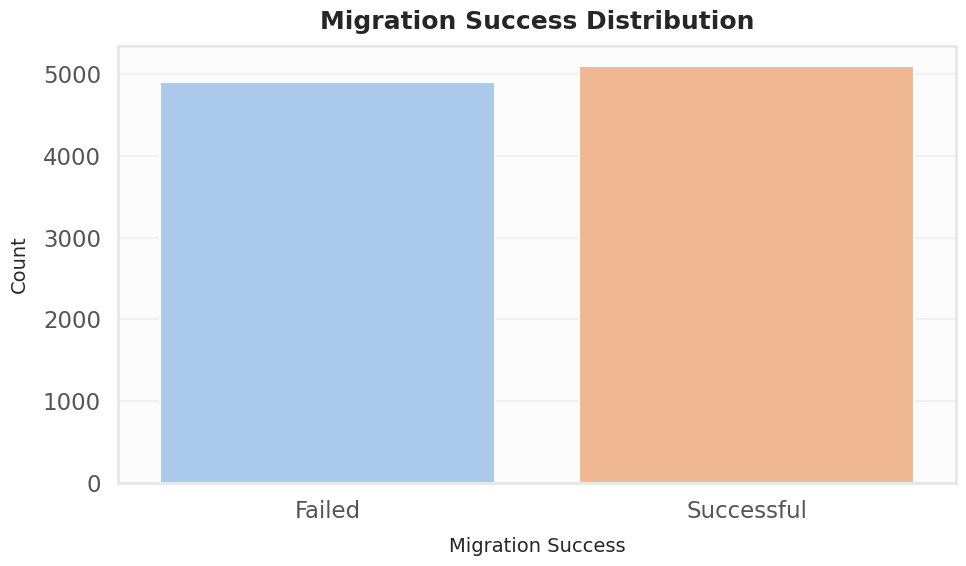

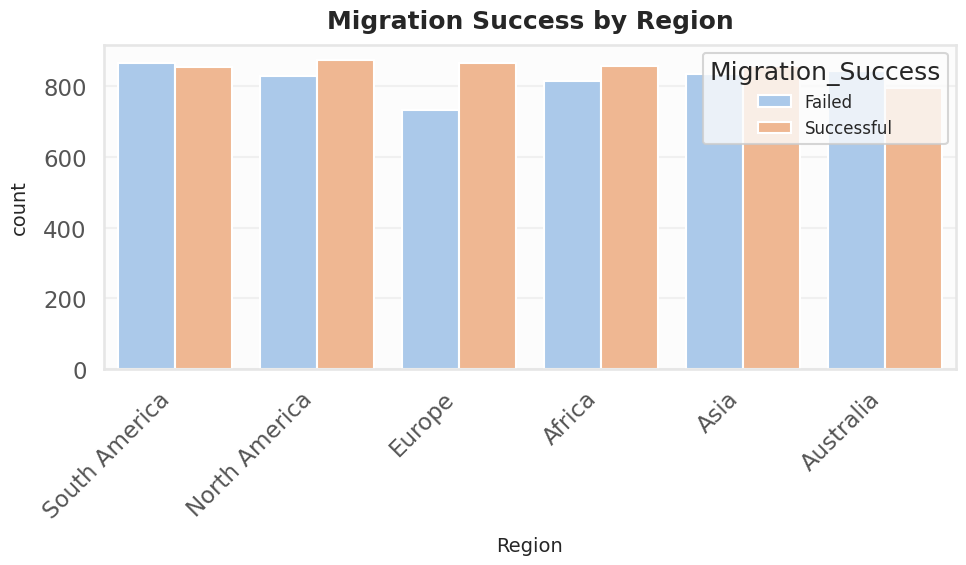

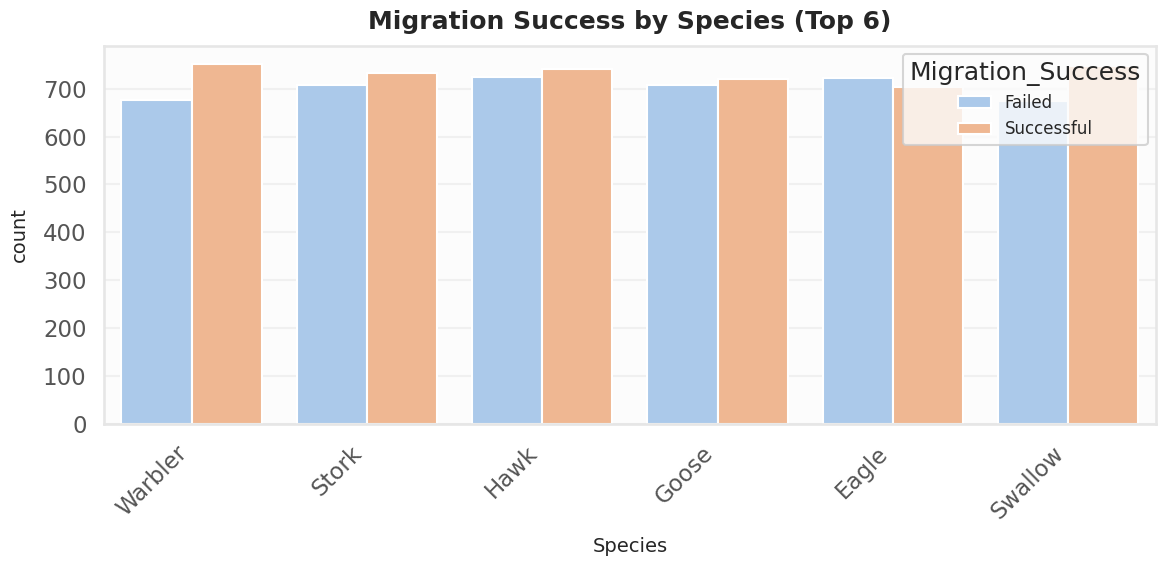

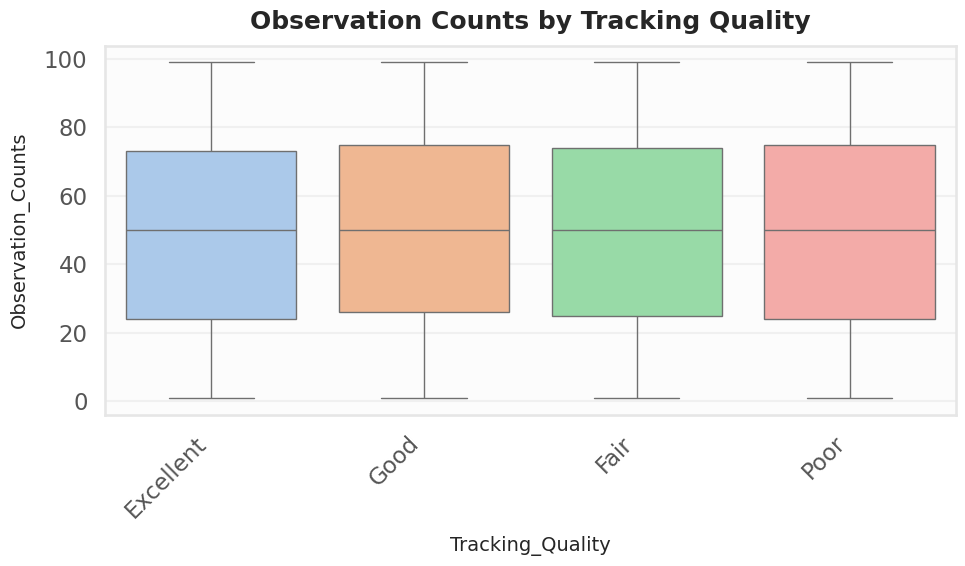

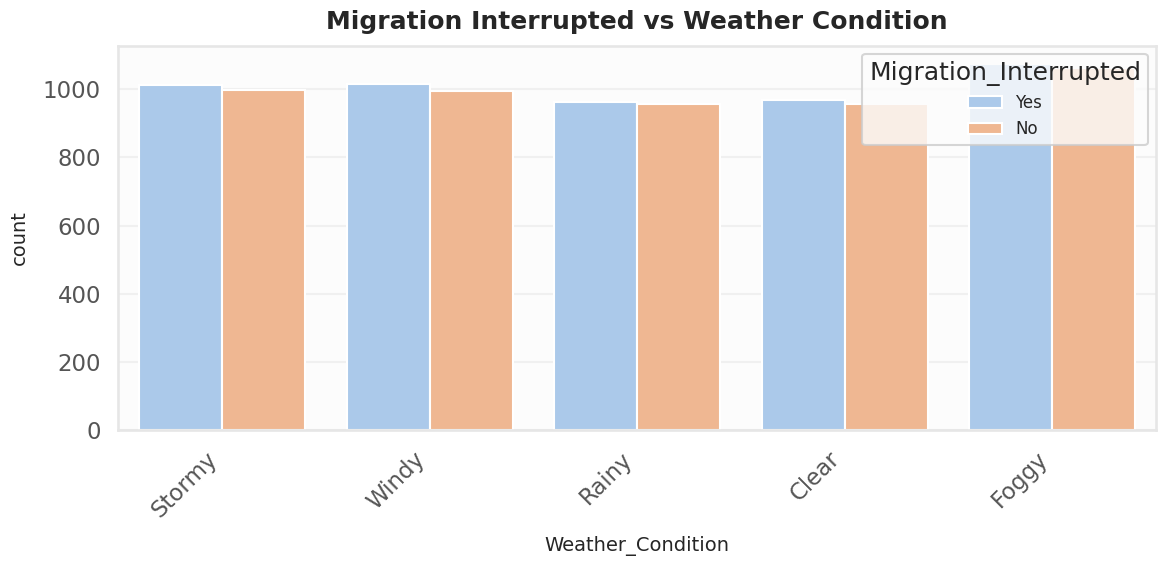

In [ ]:

# 10. OUTCOMES & BEHAVIOR (SUCCESS, WEATHER, TRACKING)


# Migration success distribution
if "Migration_Success" in df.columns:
    plt.figure()
    sns.countplot(data=df, x="Migration_Success", palette="pastel")
    plt.title("Migration Success Distribution")
    plt.xlabel("Migration Success")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    if "Region" in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=df,
            x="Region",
            hue="Migration_Success",
            palette="pastel"
        )
        plt.title("Migration Success by Region")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    if "Species" in df.columns:
        top_species = df["Species"].value_counts().head(6).index
        plt.figure(figsize=(12, 6))
        sns.countplot(
            data=df[df["Species"].isin(top_species)],
            x="Species",
            hue="Migration_Success",
            palette="pastel"
        )
        plt.title("Migration Success by Species (Top 6)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

# Tracking quality vs observation counts
if "Tracking_Quality" in df.columns and "Observation_Counts" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x="Tracking_Quality",
        y="Observation_Counts",
        palette="pastel"
    )
    plt.title("Observation Counts by Tracking Quality")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Weather vs interruption
if "Weather_Condition" in df.columns and "Migration_Interrupted" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df,
        x="Weather_Condition",
        hue="Migration_Interrupted",
        palette="pastel"
    )
    plt.title("Migration Interrupted vs Weather Condition")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [ ]:
import plotly.express as px

plotly_pastel = [
    "#FFB5E8", "#B28DFF", "#AFF8DB",
    "#FFCCF9", "#C5A3FF", "#97FFF4",
]

fig = px.scatter_geo(
    df,
    lat="Start_Latitude",
    lon="Start_Longitude",
    color="Region",
    color_discrete_sequence=plotly_pastel,
    hover_name="Species",
    opacity=0.55,
    projection="natural earth",
    title="Bird Migration – Start Locations"
)

# ---- Make Map Borders Dark & Bold ----
fig.update_geos(
    showcountries=True,
    countrycolor="black",
    countrywidth=2,
    coastlinecolor="black",
    coastlinewidth=2.5,
    showland=True,
    landcolor="white",
    showocean=True,
    oceancolor="white"
)

# Clean white background
fig.update_layout(
    template="plotly_white",
    height=600,
    margin={"r": 40, "t": 70, "l": 40, "b": 40}
)

fig.show()